## Implementation of CNN
#### Classification Problem
Using cifar10 dataset

In this project we would try to build an Convolusion Neural Network that would classify the objects in the colored images i.e. whether the object in the image is a cat or a dog, etc. The images of the cifar10 dataset are RGB image with 3 color depths (red, green, blue).

Using Lenet Architecture

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.warn('ignore')

<ipython-input-1-d4498e671f26>:8: UserWarning: ignore
  warnings.warn('ignore')


In [2]:
from keras.datasets import cifar10

In [3]:
cifar10_class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [4]:
## Train-Test split
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
## Splitting the data into training, validation and test data and also scaling the input data
## Each of the pixel value ranges from 0 to 255. So we can divide the input features of the training, validation, and test data by 255 in order to scale it down between 0 and 1.
x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test/255

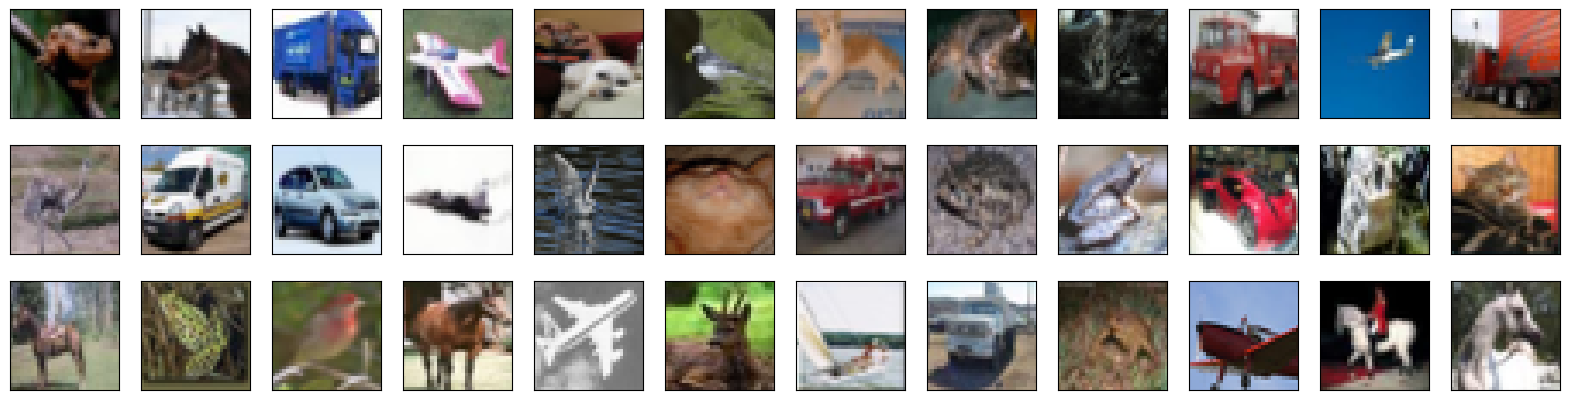

In [6]:
## Visualizing some of the images of the cifar10 dataset
figure = plt.figure(figsize=(20,5))
for i in range(36):
    ax = figure.add_subplot(3,12,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [7]:
print('Number of training samples :', len(x_train))
print('Number of validation samples :', len(x_valid))
print('Number of test samples :', len(x_test))

Number of training samples : 45000
Number of validation samples : 5000
Number of test samples : 10000


In [8]:
## Reshaping the images

print('Shape of the image', x_train.shape) ## Original shape
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
print('Shape of the training image', x_train.shape)

x_valid = x_valid.reshape(x_valid.shape[0], 32, 32, 3)
print('Shape of the validation image', x_valid.shape)

x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
print('Shape of the test image', x_test.shape)

Shape of the image (45000, 32, 32, 3)
Shape of the training image (45000, 32, 32, 3)
Shape of the validation image (5000, 32, 32, 3)
Shape of the test image (10000, 32, 32, 3)


Model Building

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

model = Sequential()

## First layer of convolusion
model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

## Second layer of convolusion
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

## Third layer of convolusion
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(400, activation='relu')) ## dense layer 1

model.add(Dense(10, activation='softmax')) ## dense layer 2

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

Callbacks

In [10]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [11]:
checkpoint_path = 'Model_Ckeckpoint.h5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model Training

In [13]:
history = model.fit(x_train, y_train, batch_size=64,  epochs=20, validation_data=(x_valid, y_valid), callbacks=[early_stopping_callback, checkpoint_callback], verbose=2, shuffle=True)

Epoch 1/20
704/704 - 50s - loss: 1.6073 - accuracy: 0.4194 - val_loss: 1.4371 - val_accuracy: 0.4884 - 50s/epoch - 72ms/step
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


704/704 - 49s - loss: 1.1799 - accuracy: 0.5826 - val_loss: 1.2677 - val_accuracy: 0.5664 - 49s/epoch - 69ms/step
Epoch 3/20
704/704 - 49s - loss: 0.9923 - accuracy: 0.6509 - val_loss: 1.2282 - val_accuracy: 0.5710 - 49s/epoch - 70ms/step
Epoch 4/20
704/704 - 48s - loss: 0.8670 - accuracy: 0.6964 - val_loss: 0.9910 - val_accuracy: 0.6542 - 48s/epoch - 68ms/step
Epoch 5/20
704/704 - 52s - loss: 0.7603 - accuracy: 0.7352 - val_loss: 0.9570 - val_accuracy: 0.6820 - 52s/epoch - 74ms/step
Epoch 6/20
704/704 - 50s - loss: 0.6695 - accuracy: 0.7661 - val_loss: 0.9110 - val_accuracy: 0.6878 - 50s/epoch - 71ms/step
Epoch 7/20
704/704 - 48s - loss: 0.5862 - accuracy: 0.7962 - val_loss: 0.9994 - val_accuracy: 0.6692 - 48s/epoch - 68ms/step
Epoch 8/20
704/704 - 50s - loss: 0.5019 - accuracy: 0.8250 - val_loss: 0.9353 - val_accuracy: 0.6984 - 50s/epoch - 71ms/step
Epoch 9/20
704/704 - 53s - loss: 0.4246 - accuracy: 0.8526 - val_loss: 0.9799 - val_accuracy: 0.7062 - 53s/epoch - 75ms/step
Epoch 10/20

In [14]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.607323,0.419400,1.437137,0.4884
1,1.179855,0.582644,1.267669,0.5664
2,0.992343,0.650911,1.228230,0.5710
3,0.866966,0.696444,0.990959,0.6542
4,0.760318,0.735222,0.956955,0.6820
5,0.669504,0.766067,0.911045,0.6878
6,0.586222,0.796178,0.999420,0.6692
7,0.501878,0.825044,0.935306,0.6984
8,0.424650,0.852556,0.979927,0.7062
9,0.353097,0.875156,1.120577,0.7020


<Axes: >

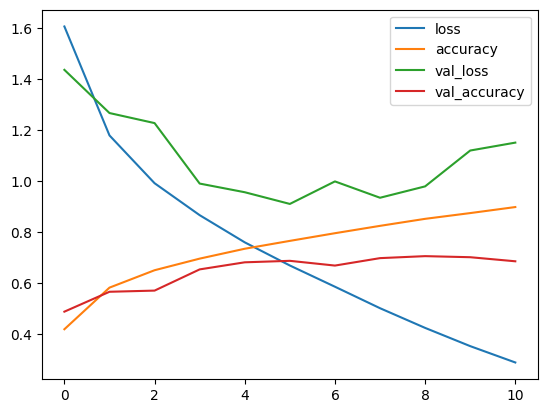

In [15]:
pd.DataFrame(history.history).plot()

Loading Checkpoint Model

In [16]:
checkpoint_model = tf.keras.models.load_model(checkpoint_path)

In [17]:
score = checkpoint_model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9303 - accuracy: 0.6819


In [19]:
print('model accuracy =', score[1]*100, '%')

model accuracy = 68.19000244140625 %


In [21]:
y_pred = checkpoint_model.predict(x_test)
y_pred.round(2) ## rounding-off the probability to two digits

313/313 [==============================] - 5s 16ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.13, 0.  , ..., 0.  , 0.86, 0.  ],
       [0.13, 0.02, 0.  , ..., 0.  , 0.82, 0.01],
       ...,
       [0.  , 0.  , 0.08, ..., 0.  , 0.  , 0.  ],
       [0.18, 0.23, 0.01, ..., 0.03, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ]], dtype=float32)

In [22]:
y_pred

array([[2.4863440e-03, 5.6398468e-04, 1.9839769e-03, ..., 2.6543357e-04,
        2.3517602e-03, 2.1847570e-04],
       [5.8765691e-03, 1.3426690e-01, 3.4540870e-05, ..., 3.4894136e-09,
        8.5959232e-01, 2.2854877e-04],
       [1.3496189e-01, 1.7973553e-02, 2.3676946e-03, ..., 4.5616794e-03,
        8.2242835e-01, 1.4418094e-02],
       ...,
       [8.8092929e-07, 2.1874607e-06, 8.4053122e-02, ..., 1.9076742e-03,
        2.6301186e-05, 3.7266123e-05],
       [1.7635649e-01, 2.3101178e-01, 1.3368798e-02, ..., 2.6108967e-02,
        6.6087069e-04, 1.6746256e-03],
       [8.5296591e-07, 6.1380753e-08, 2.5966045e-04, ..., 9.9785197e-01,
        2.5749307e-08, 1.0839912e-07]], dtype=float32)

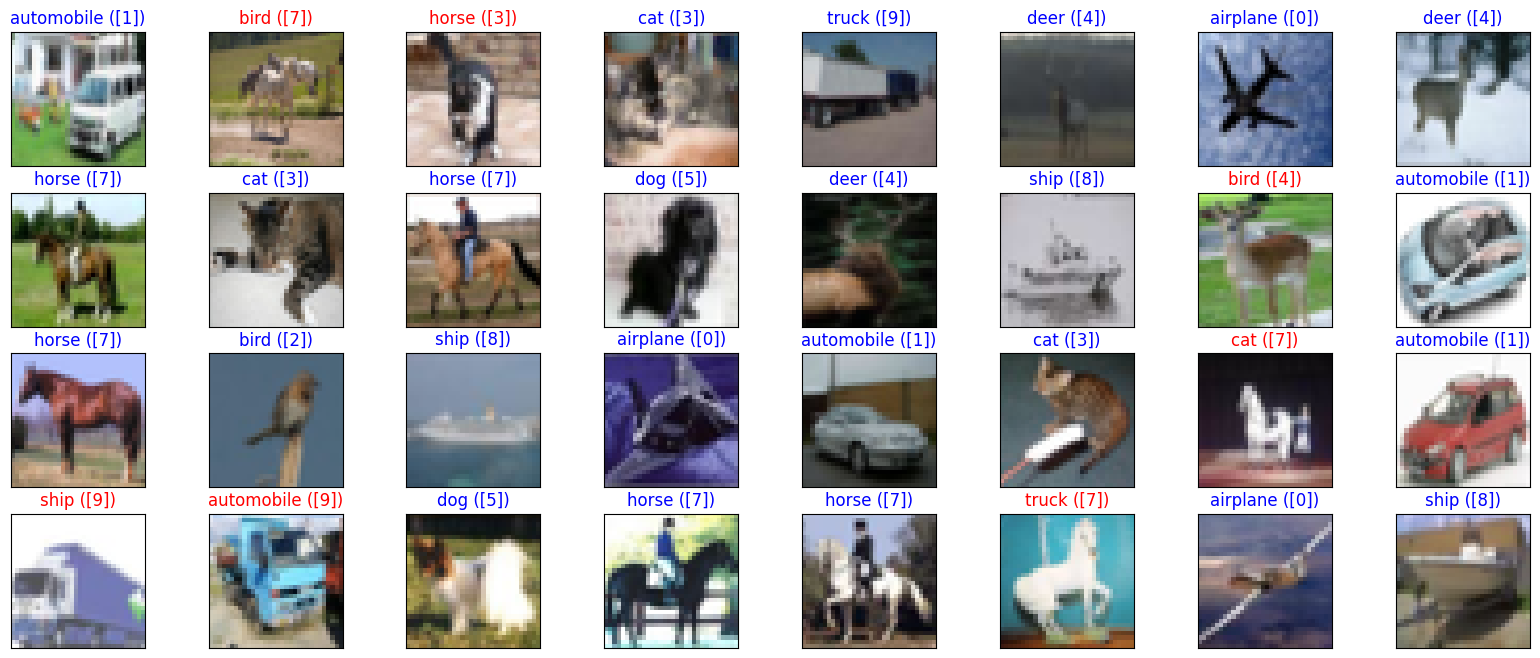

In [39]:
figure = plt.figure(figsize=(20,8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = figure.add_subplot(4,8,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = y_test[idx]
    ax.set_title("{} ({})".format(cifar10_class_names[pred_idx], true_idx), color=("blue" if pred_idx == true_idx else "red"))

In [36]:
cifar10_class_names

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

All images with blue labels are correct predictions and all images with red labels are wrong predictions.